<a href="https://colab.research.google.com/github/sonu9479/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Vivek Singh
**Cohort -** London

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/sonu9479/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-project/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [225]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [226]:
# Load Dataset

data_link = 'https://github.com/sonu9479/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-project/raw/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv'

data = pd.read_csv(data_link, encoding= 'unicode_escape')

### Dataset First View

In [227]:
# Dataset First Look
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [228]:
# Dataset Rows & Columns count
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 7787 rows and 12 columns


### Dataset Information

In [229]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [230]:
# Dataset Duplicate Value Count
print(f'There are {len(data[data.duplicated()])} duplicate values in dataset.')

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [231]:
# Missing Values/Null Values Count
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

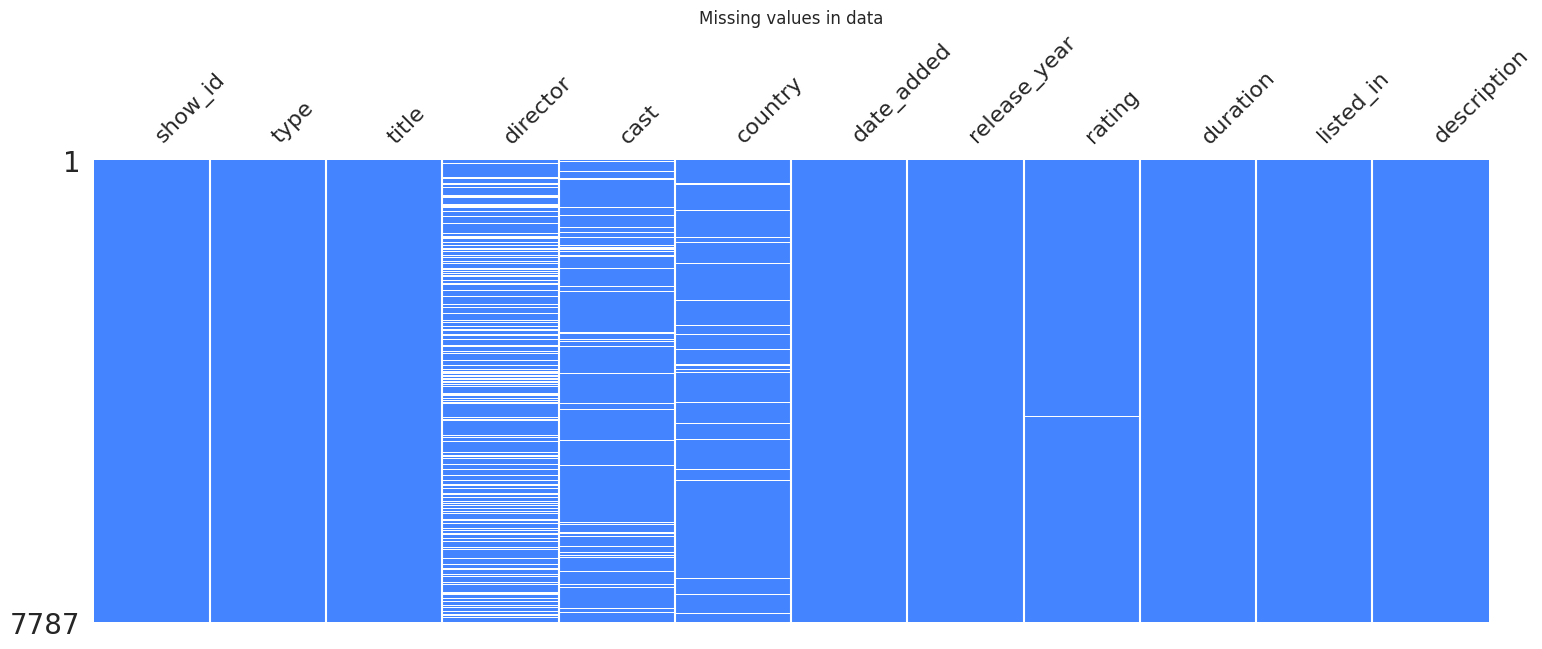

In [232]:
# Visualizing the missing values

import missingno as msno

# Create the missingness matrix
msno.matrix(data, figsize=(18, 6), sparkline=False, color=(0.27, 0.52, 1.0))
plt.title('Missing values in data')
# Display the plot
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [233]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [234]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [235]:
# Check Unique Values for each variable.
data.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [236]:
data[['director','cast','country']] = data[['director','cast','country']].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data.dropna(axis=0, inplace = True)

In [237]:
# Write your code to make your dataset analysis ready.
data['date_added'] = pd.to_datetime(data['date_added'])

In [238]:
import datetime as dt
data['month_added'] = pd.to_datetime(data['date_added']).dt.month


In [239]:
data['month_added'] = pd.to_datetime(data['month_added'], format='%m').dt.strftime('%B')
data['year_added'] = pd.to_datetime(data['date_added']).dt.year

In [240]:
data.drop(['date_added','show_id'], inplace = True, axis = 1)

In [241]:
data

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,3%,Unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,2019
7784,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September,2020
7785,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,October,2020


In [242]:
data['type'].groupby(data['duration']).value_counts()

duration    type   
1 Season    TV Show    1608
10 Seasons  TV Show       5
10 min      Movie         1
100 min     Movie        97
101 min     Movie        96
                       ... 
95 min      Movie       119
96 min      Movie       115
97 min      Movie       117
98 min      Movie       106
99 min      Movie       101
Name: type, Length: 216, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Movies and TV shows

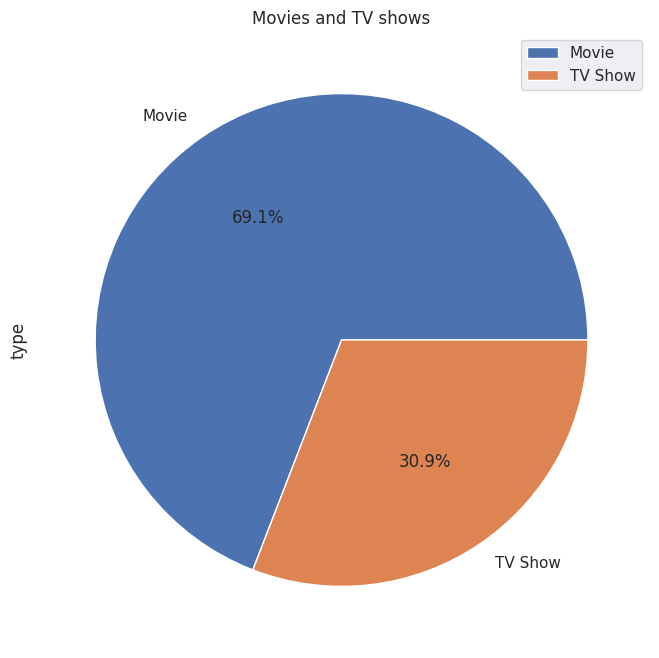

In [243]:
# Chart - 1 visualization code
data['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (15,8),title = 'Movies and TV shows')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

# Movies and TV shows added per year

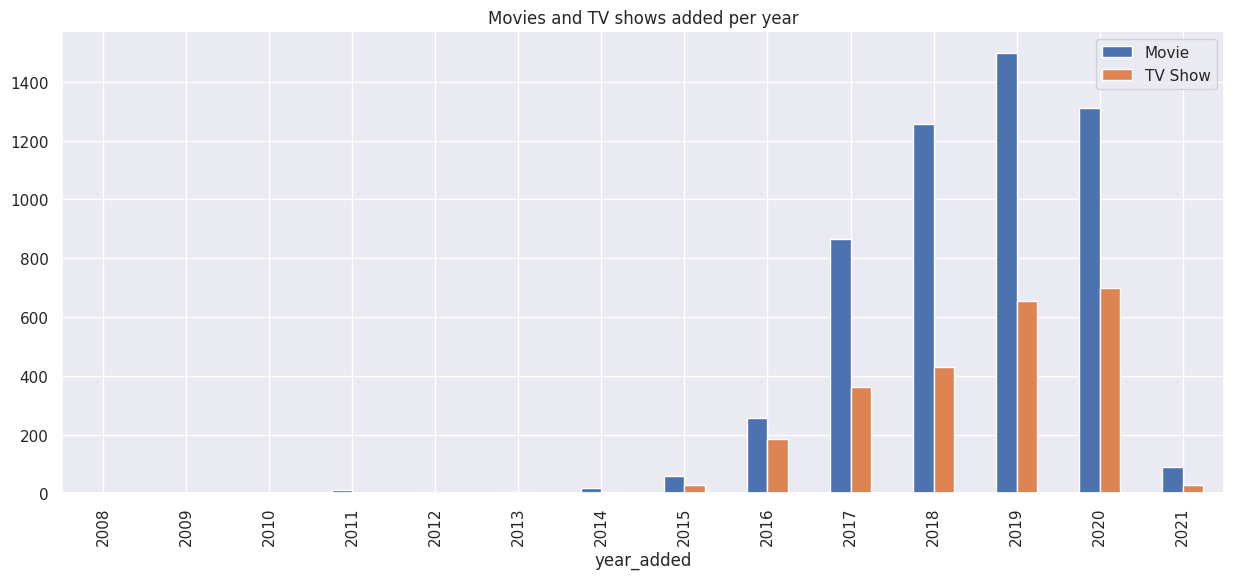

In [244]:
# Chart - 2 visualization code

data.groupby('year_added').type.value_counts().unstack().plot.bar(figsize = (15,6),title = 'Movies and TV shows added per year')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

# Top 10 countries contributing content.

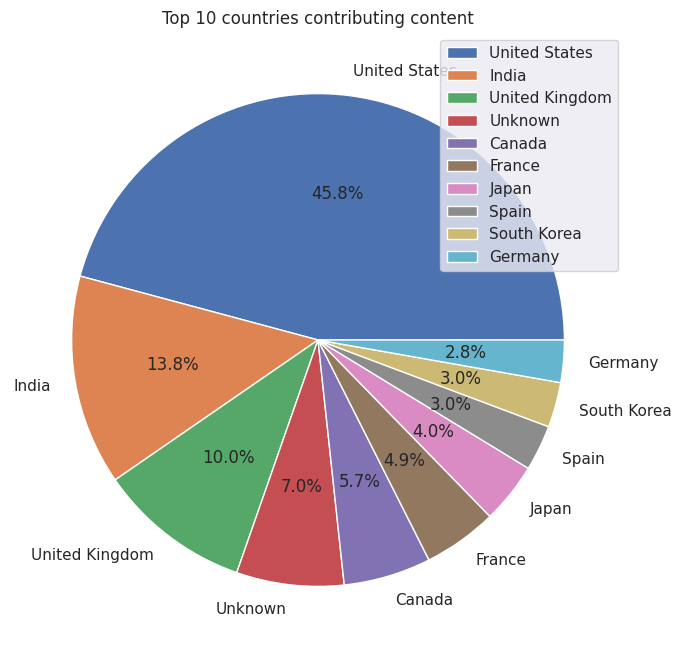

In [245]:
# Chart - 3 visualization code

(data['country'].apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[:10]).plot.pie(autopct='%1.1f%%',figsize = (8,8),title = 'Top 10 countries contributing content')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4
# Movies and TV shows release year.

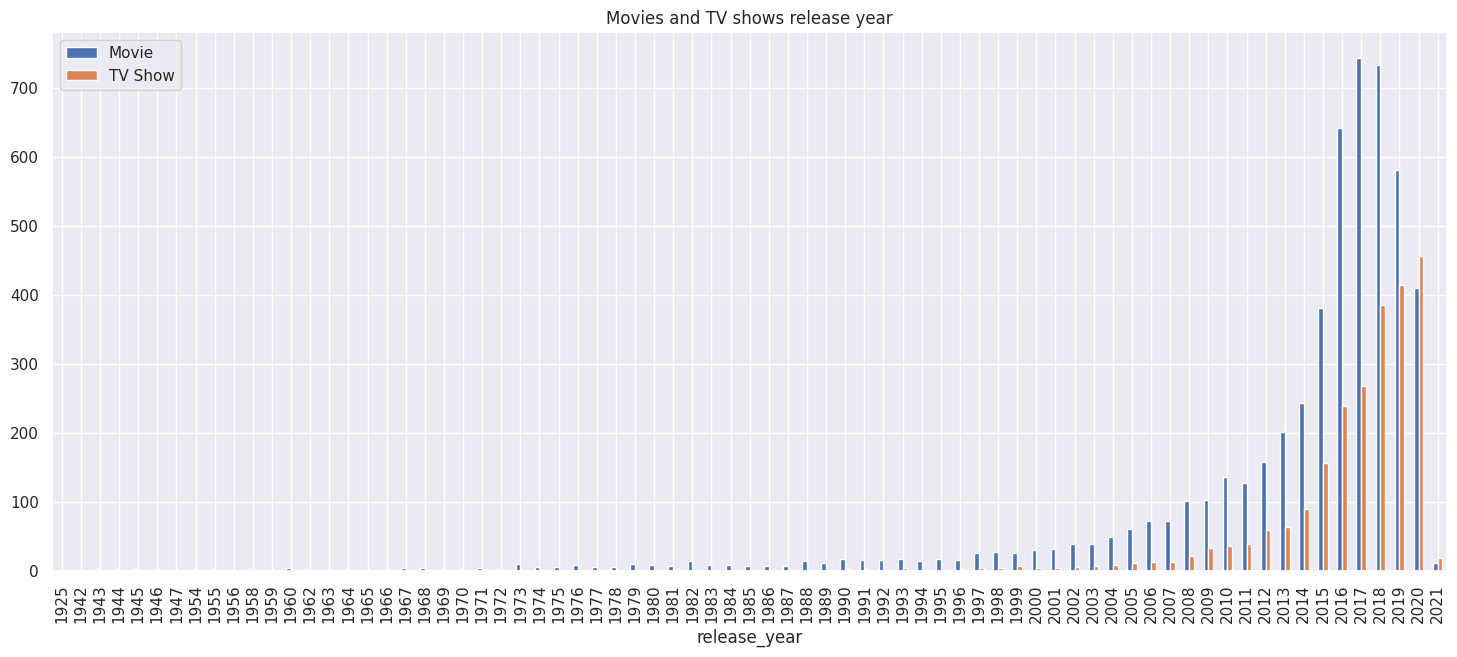

In [246]:
# Chart - 4 visualization code
data.groupby('release_year').type.value_counts().unstack().plot.bar(figsize = (18,7),title = 'Movies and TV shows release year')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5
# Top 20 directors

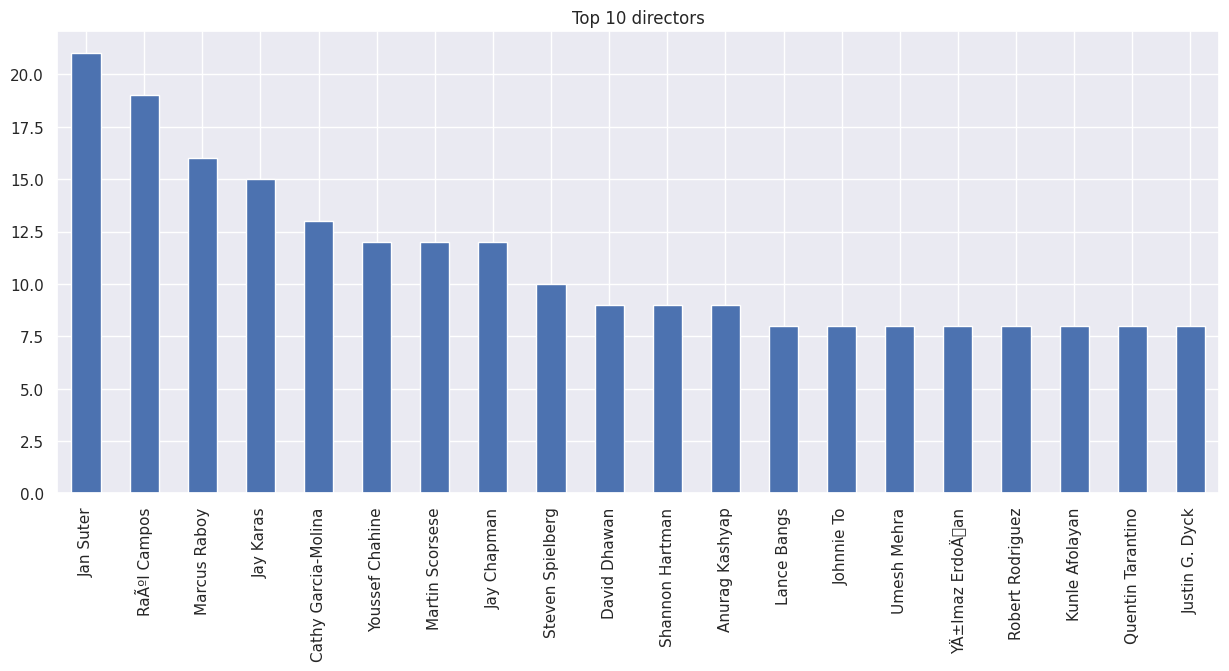

In [247]:
# Chart - 5 visualization code
(data.director.apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[1:21]).plot.bar(figsize = (15,6), title = 'Top 10 directors')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

# Top 20 actors

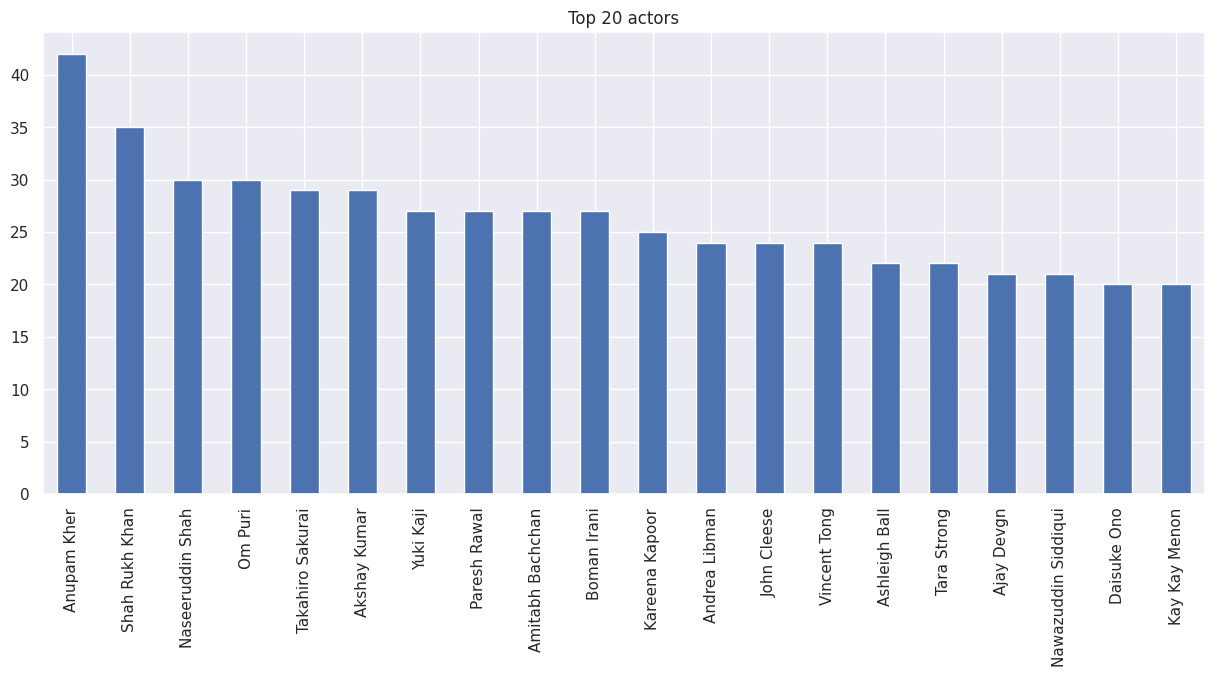

In [248]:
# Chart - 6 visualization code

(data.cast.apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()[1:21]).plot.bar(figsize = (15,6), title = 'Top 20 actors')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7
# Movie and TV Show Ratings

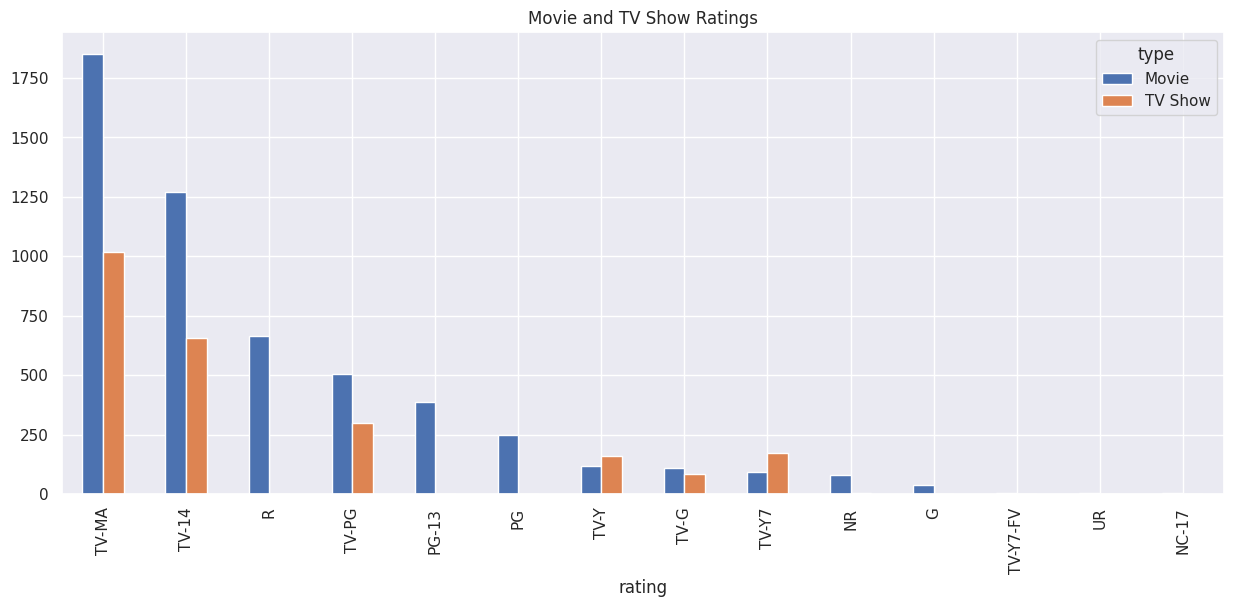

In [249]:
# Chart - 7 visualization code

data.groupby('rating').type.value_counts().unstack().sort_values(by = 'Movie',ascending = False).plot.bar(figsize = (15,6), title = 'Movie and TV Show Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

# Genre

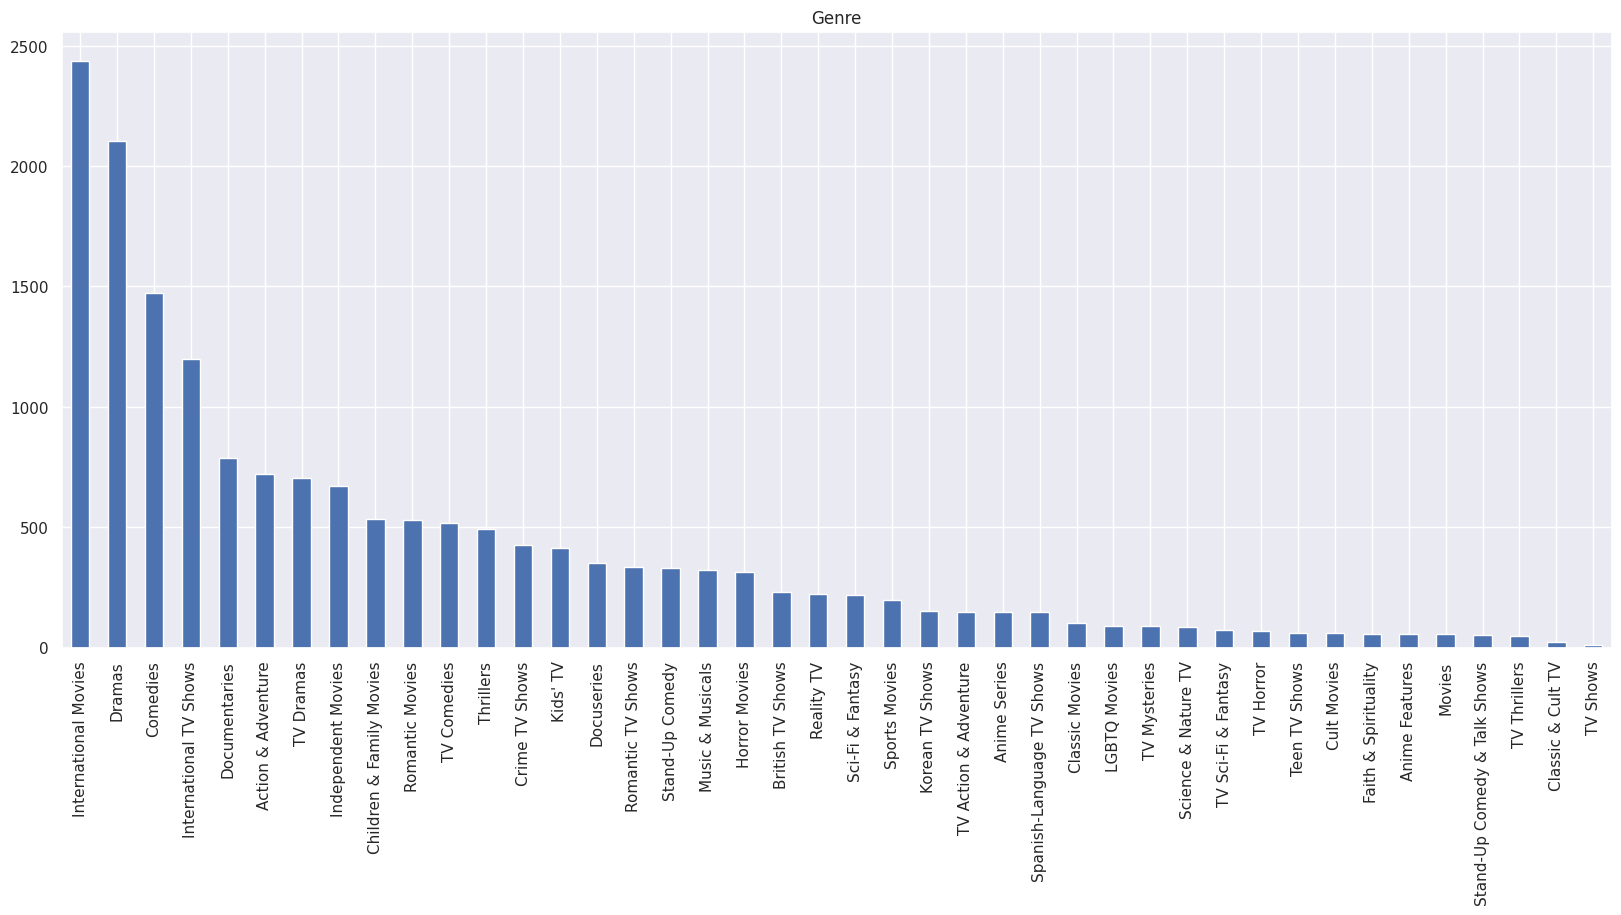

In [250]:
# Chart - 8 visualization code

(data.listed_in.apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()).plot.bar(figsize = (20,8), title = 'Genre')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9
# TV Show Seasons

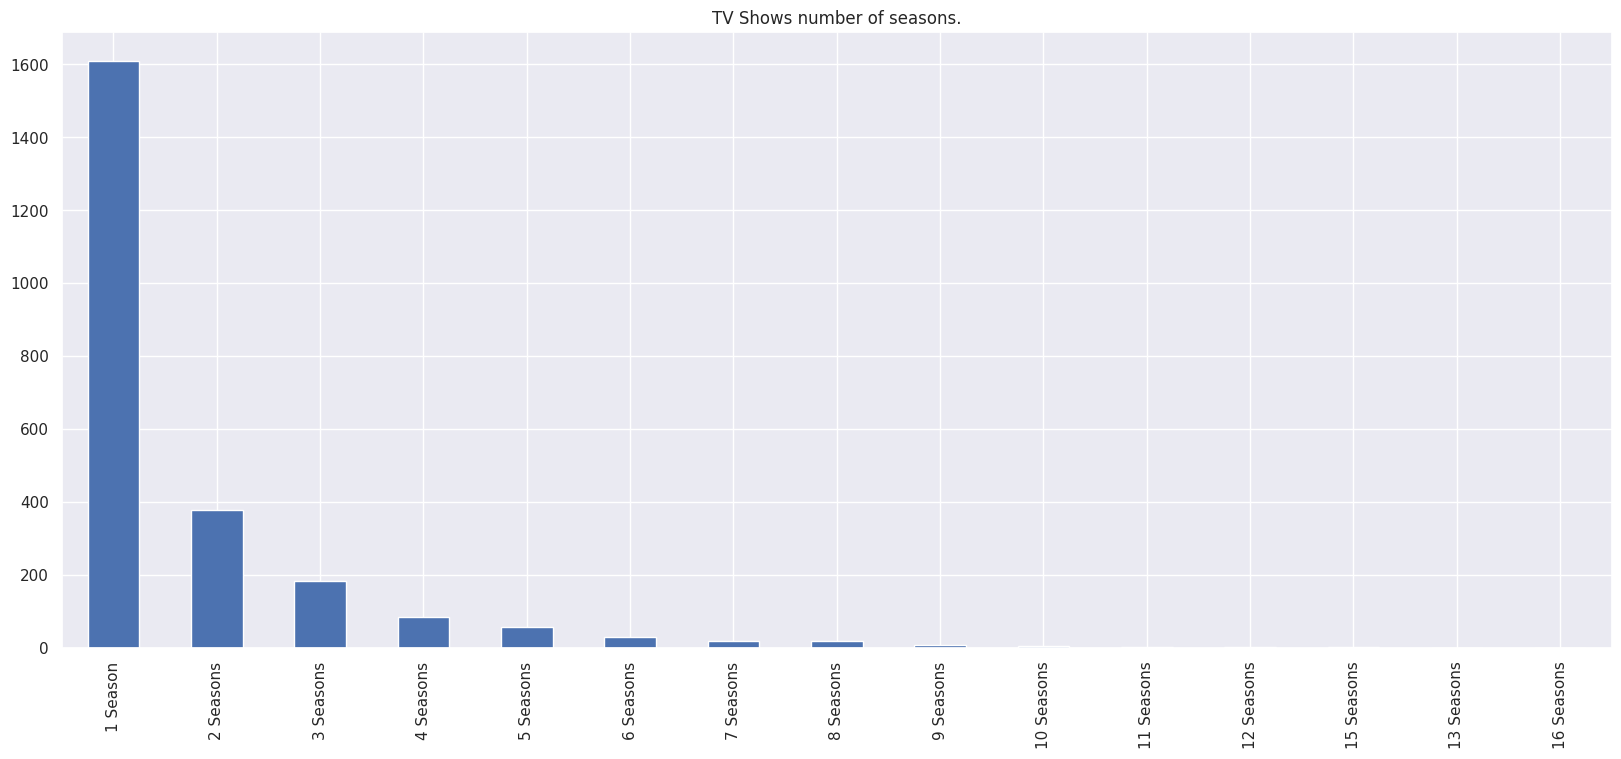

In [251]:
# Chart - 9 visualization code
data[data['type']== 'TV Show'].duration.value_counts().plot.bar(figsize = (20,8), title = 'TV Shows number of seasons.')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10
# Movie Duration

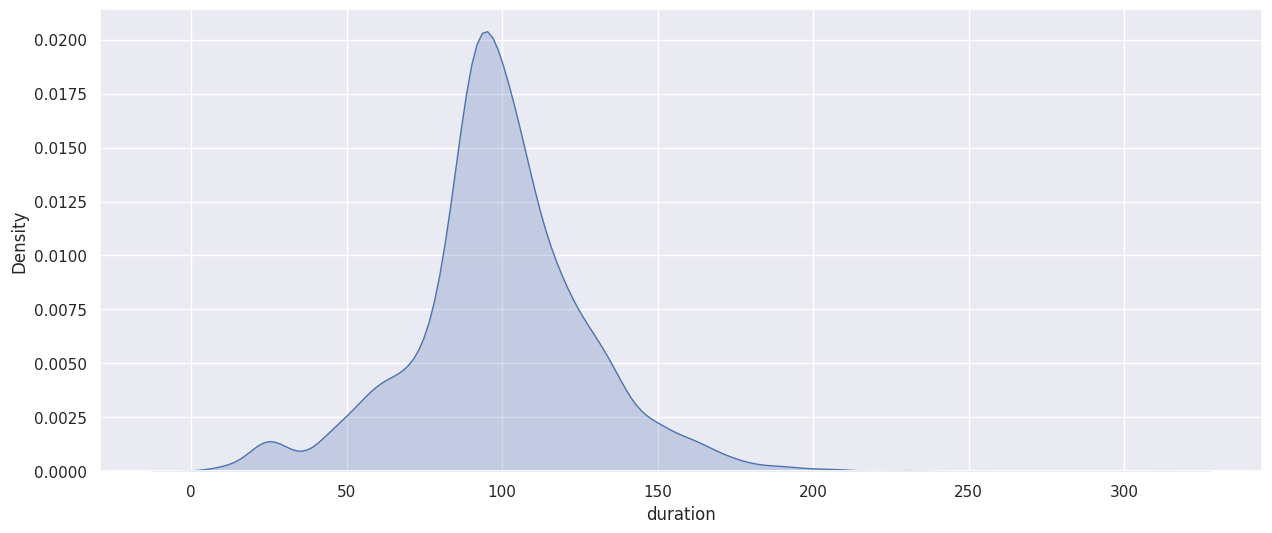

In [252]:
# Chart - 10 visualization code

plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.kdeplot(data[data['type'] == 'Movie'].duration.apply(lambda x: x[:-4]).astype(int),shade=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11
# Word Clouds

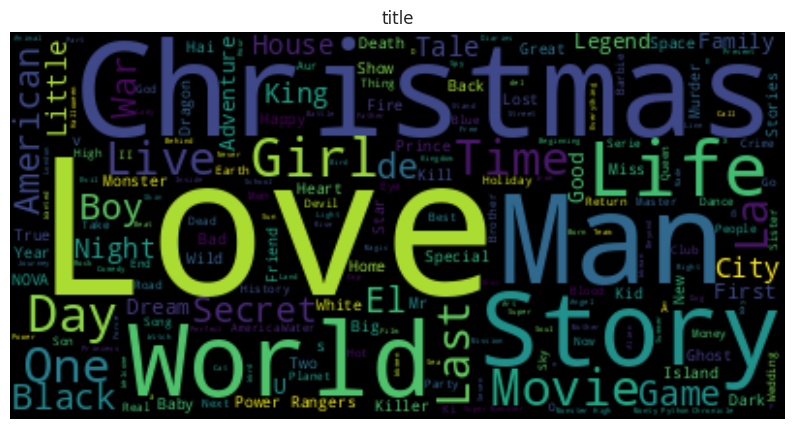

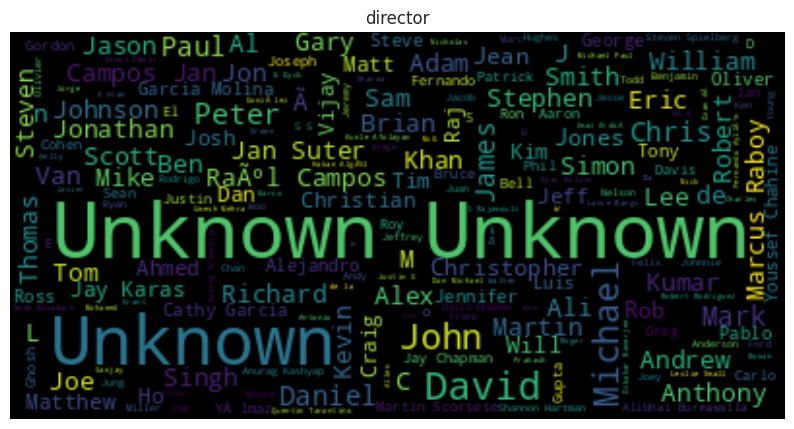

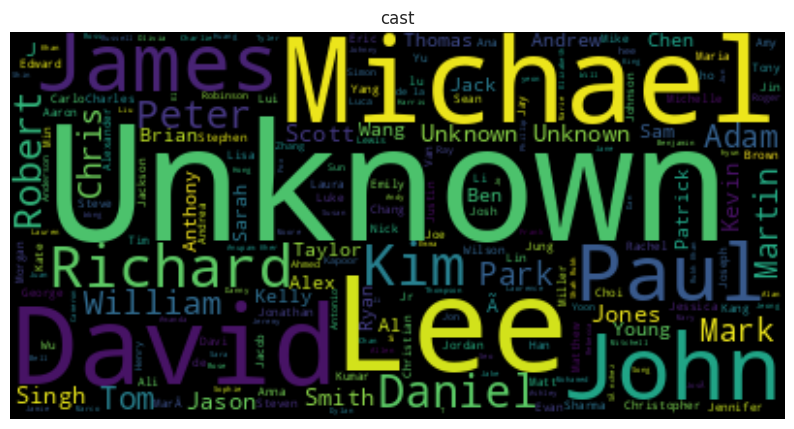

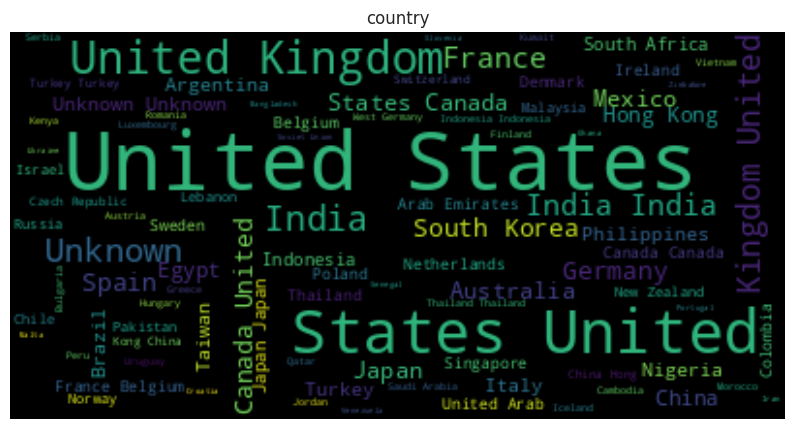

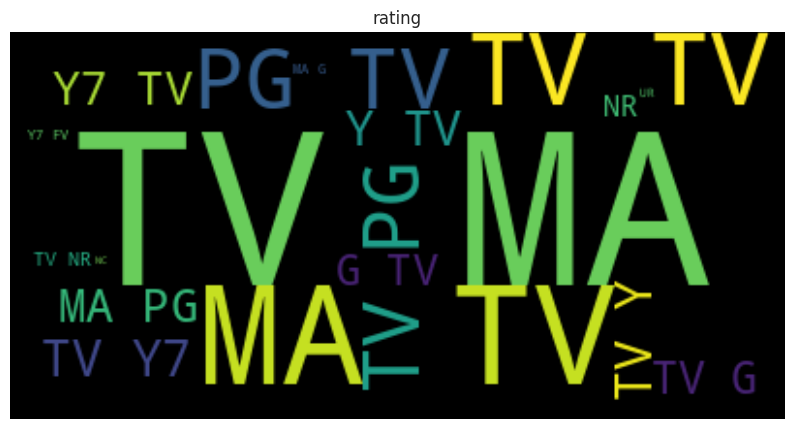

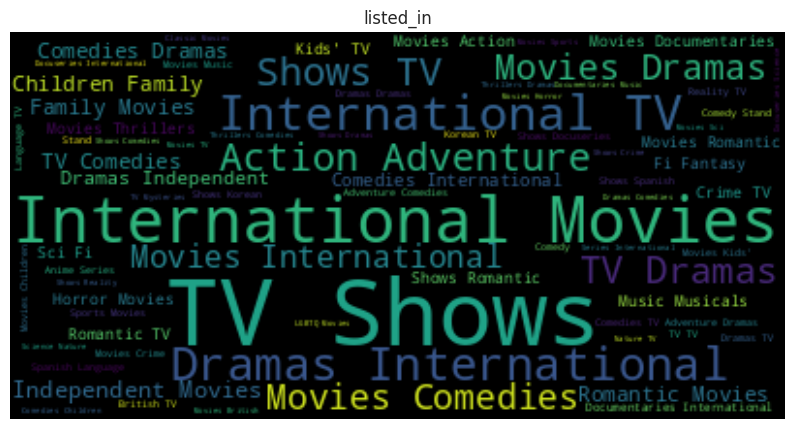

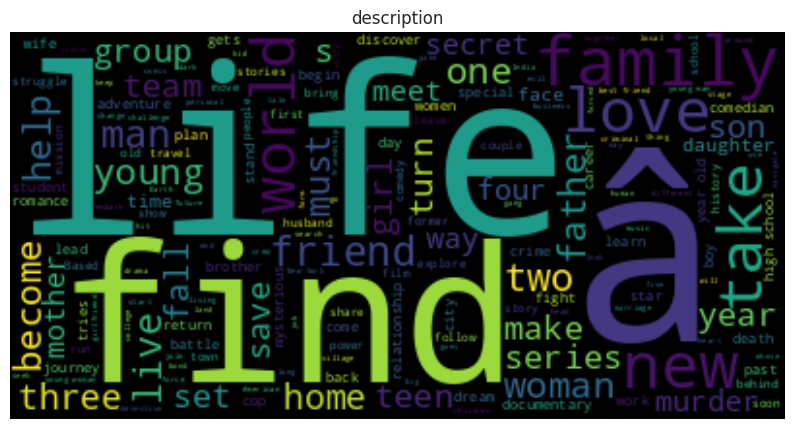

In [253]:
# Chart - 11 visualization code

cat = ['title',	'director',	'cast',	'country', 'rating',	'listed_in'	,'description']
for i in data[cat]:
  text = " ".join(word for word in data[i])

  # create the word cloud
  wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

  # plot the word cloud
  plt.figure(figsize = (10,10))
  plt.imshow(wordcloud,  interpolation='bilinear')
  plt.title(i)
  plt.axis("off")
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12
# Countries and their content ratings.

In [254]:
# Chart - 12 visualization code

def get_rating_country_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  df['rating_list'] = df.apply(lambda x: explode_country(x['rating']),axis=1)
  df = df.explode('rating_list')
  df.groupby(['country_list','rating_list']).agg({'title':'count'})
  grouped_df_ = df.groupby(['country_list','rating_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "rating_list", y="title", rot=90, figsize=(10,4))
    plt.title(f"{each}")
  return rating_country_df

In [255]:
get_rating_country_trends(data)

TypeError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

# Countries and their Genres.

In [ ]:
# Chart - 13 visualization code
def get_genre_country_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  df['genre_list'] = df.apply(lambda x: explode_country(x['listed_in']),axis=1)
  df = df.explode('genre_list')
  df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "genre_list", y="title", rot=90, figsize=(12,5))
    plt.title(f"{each}")
  return rating_country_df

In [ ]:
rating_country_df = get_genre_country_trends(data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14
# Production

In [ ]:
# Correlation Heatmap visualization code


data['Originals'] = np.where(data['year_added'] == data['release_year'], 'Netflix Original', 'Other production')
data['Originals'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (8,8),title = 'Movies and TV shows')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

# Correlation Heatmap

In [ ]:
# Pair Plot visualization code\

#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

In [ ]:
# Preparing data for heatmap
data['count'] = 1
df = data.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['country']

df_heatmap = data.loc[data['country'].isin(df)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

In [ ]:
# Chart - 13 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

## Textual Data Preprocessing

In [ ]:
data.tail()

In [ ]:
#merging all text column to single text column to work with

data['text'] =	data['director'] + ' ' +	data['cast'] + ' ' +	data['country'] + ' ' +		data['rating'] + ' '+ data['listed_in'] + ' '+	data['description']

In [ ]:
#filled all the missing value with empty strings

data['text'] = data['text'].fillna("")

In [ ]:
data['text'][0]

#### 2. Lower Casing

In [ ]:
# Lower Casing
data['text'] = data['text'].apply(lambda x: x.lower())

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

def remove_punctuation(text):
    # Remove punctuation marks using string.punctuation
    no_punct = ''.join(char for char in text if char not in string.punctuation)
    return no_punct

data['text'] = data['text'].apply(remove_punctuation)
data['text'][0]

#### 5. Removing Stopwords

In [ ]:
# Remove Stopwords

import nltk
nltk.download('punkt')


def remove_stopwords(text):
    # Tokenizing the text into words again
    words = nltk.word_tokenize(text)
    # Removing stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into a single string
    text = ' '.join(words)
    return text

data['text'] = data['text'].apply(remove_stopwords)

In [ ]:
data['text'][0]

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()


In [ ]:
from nltk.tokenize import word_tokenize

text = data['text']
tokens = data['text'].apply(word_tokenize)


In [ ]:
stemmed_tokens = tokens.apply(lambda x: [stemmer.stem(token) for token in x])
stemmed_tokens = stemmed_tokens.apply(lambda x: " ".join(x))



In [ ]:
stemmed_tokens[2]

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer


# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)

# Calculate TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['text'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to a pandas DataFrame
tfidf_table = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF table
print(tfidf_table)

# Dimesionality Reduction

In [ ]:
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

pca.fit(tfidf_matrix.toarray())



In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.95, color='red', linestyle='--')
plt.axvline(x= 4685, color='green', linestyle='--')
plt.show()

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=0.95, random_state=42)
pca.fit(tfidf_matrix.toarray())

In [ ]:

# transformed features
X = pca.transform(tfidf_matrix.toarray())

# shape of transformed vectors
X.shape

##### Which text vectorization technique have you used and why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_metrics(data, labels):
    # Compute clustering evaluation metrics
    silhouette_avg = silhouette_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    db_score = davies_bouldin_score(data, labels)

    # Create a pandas DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
        'Score': [silhouette_avg, ch_score, db_score]
    })

    # Set a custom color palette for the table
    sns.set_palette("Set2")

    # Create a heatmap to visualize the metrics
    plt.figure(figsize=(8, 3))
    sns.heatmap(data=metrics_df.set_index('Metric'), annot=True, fmt=".3f", cmap='YlGnBu', cbar=False)
    plt.title('Clustering Evaluation Metrics')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the plot
    plt.show()



### ML Model - 1

# K-Means Clustering

In [ ]:
# Finding the appropriate cluster number using Elbow Method.

from sklearn.cluster import KMeans
from sklearn import datasets

# Load the dataset
transformed_data = X

# Define the range of cluster numbers (k)
k_values = range(1, 16)

# Perform clustering with different k values and compute SSE
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transformed_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
transformed_data = X

k_values = range(2, 11)  # Example range of cluster numbers from 2 to 10

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(transformed_data)
    cluster_labels = kmeans.labels_
    score = silhouette_score(transformed_data, cluster_labels)
    silhouette_scores.append(score)


In [ ]:
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [ ]:
# Create K-means model

kmeans = KMeans(n_clusters=5)


# Fit the model to the transformed data
kmeans.fit(transformed_data)



In [ ]:
# Get cluster assignments for the transformed data points
cluster_labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

y_kmeans = kmeans.predict(X)

unique_labels = np.unique(cluster_labels)

In [ ]:

plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
evaluate_clustering_metrics(X, cluster_labels)

In [ ]:
data

In [ ]:
data.shape[0]

In [ ]:

len(y_kmeans)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***